In [10]:
import cv2

In [56]:
import numpy as np
from numpy import ndarray

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# clone macro define

MAX_IMG_DIM = 600
TOLERANCE = 0.01
FRAME_MAX = 20
SOBEL_THRESH = 0.4
EXPIXEL = 25

In [41]:
# dummy cv2.imshow considering it does not works in jupyter notebook well

def imshow(*args):
    label = None
    mat = None
    if len(args) == 2:
        label = args[0]
        mat = args[1]
    elif len(args) == 1:
        mat = args[0]
    else:
        raise ValueError
    
    plt.figure(figsize = (12,12))
    if len(mat.shape) == 3:
        plt.imshow(mat)
    elif len(mat.shape) == 2:
        plt.imshow(mat, cmap='gray')
    if label is not None:
        plt.title(label)
    plt.show()

In [13]:
TotalTime = 0.0
AveTime = 0.0

In [14]:
imgpath = "videos/5.avi"

In [15]:
video = cv2.VideoCapture(imgpath)

In [16]:
video

<VideoCapture 0000028EDF534310>

In [17]:
video.isOpened()

True

In [18]:
use_Gray = True
remove_border = False
use_MBSPlus = False

In [19]:
ok, img1 = video.read()

ok, type(img1), img1.shape

(True, numpy.ndarray, (360, 640, 3))

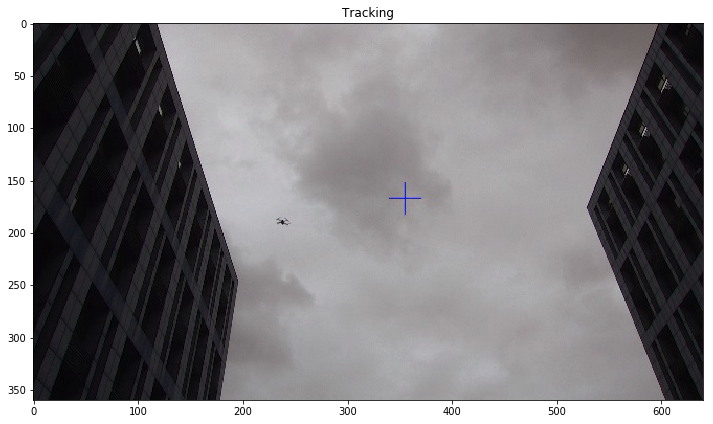

In [22]:
imshow("Tracking", img1)

In [24]:
# img = doWork(img1, use_Gray, remove_border, use_MBSPlus);
# Mat doWork(const Mat& src, bool use_Gray, bool remove_border, bool use_MBSPlus)

# we will first show how it work in top level, then wrap it in a function called doWork as well.

src = img1

In [28]:
w = src.shape[1]
h = src.shape[0]
maxD = max(w,h)
src_small = cv2.resize(src, (int(MAX_IMG_DIM*w / maxD), int(MAX_IMG_DIM*h / maxD)), 0.0, 0.0, cv2.INTER_AREA)

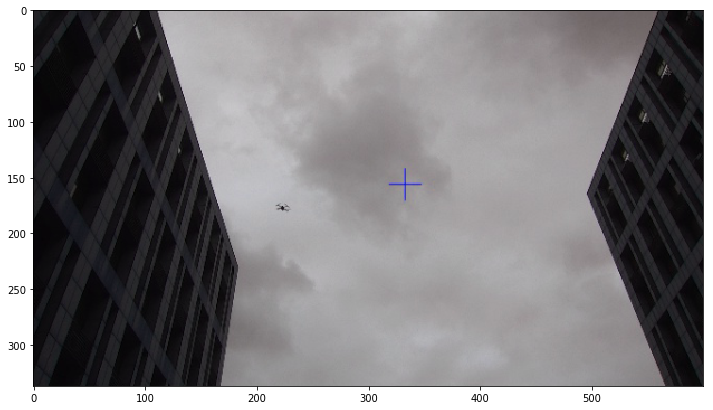

In [32]:
imshow(src_small)

In [33]:
src.shape,'->',src_small.shape

((360, 640, 3), '->', (337, 600, 3))

In [35]:
if remove_border:
    #srcRoi, roi = removeFrame(src_small)
    raise NotImplemented
else:
    srcRoi = src_small
    roi = (0, 0, src_small.shape[1], src_small.shape[0]) # (left,top,width,height)

In [38]:
if use_Gray:
    srcRoi = cv2.cvtColor(srcRoi, cv2.COLOR_RGB2GRAY);


In [39]:
srcRoi.shape

(337, 600)

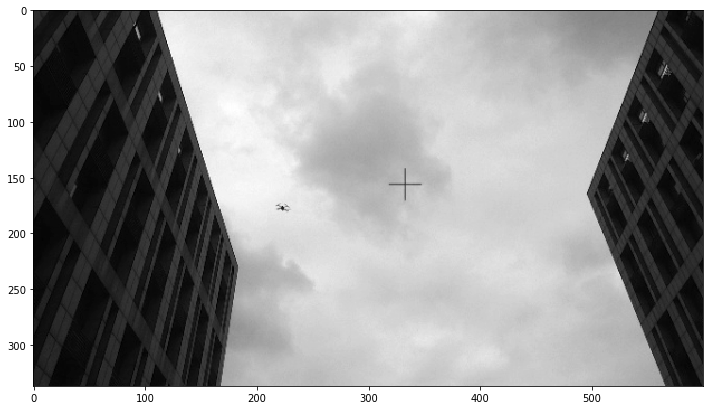

In [42]:
imshow(srcRoi)

In [73]:
# MBS mbs(srcRoi); # overload MBS::MBS(const Mat& src)

src = srcRoi

mAttMapCount = 0
mSrc = src.copy()
mSaliencyMap = np.zeros_like(src)
mFeatureMaps = cv2.split(mSrc) # it's possible that srcRoi is 3 channel instead of one # std::vector<cv::Mat>

In [74]:
mSrc.shape

(337, 600)

In [71]:
type(mFeatureMaps), len(mFeatureMaps), mFeatureMaps[0].shape

(list, 1, (337, 600))

In [72]:
mSrc.shape

(337, 600)

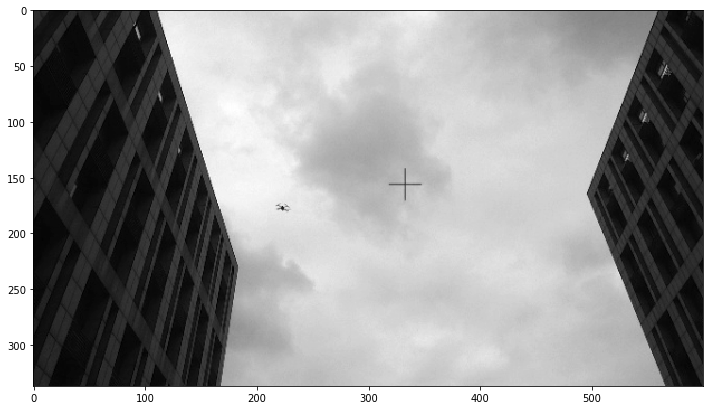

In [75]:
imshow(mFeatureMaps[0])

In [76]:
for i in range(len(mFeatureMaps)):
    mFeatureMaps[i] = cv2.medianBlur(mFeatureMaps[i], 5)

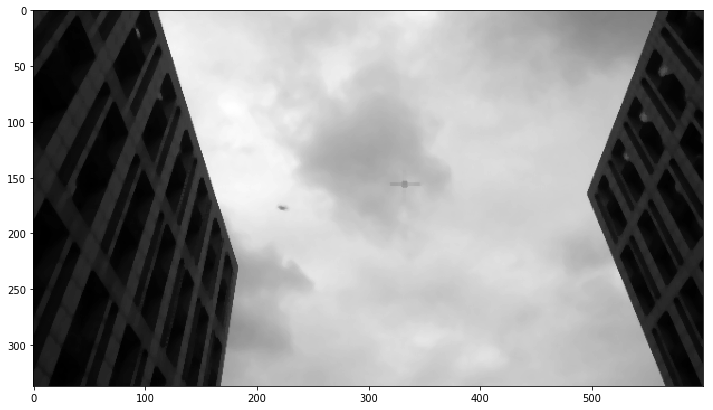

In [77]:
imshow(mFeatureMaps[0])

In [78]:
# mbs.computeSaliency(use_MBSPlus);
use_MBSPlus

False

In [91]:
# mMBSMap = fastMBS(mFeatureMaps);
featureMaps = mFeatureMaps
assert featureMaps[0].dtype == np.uint8 and len(featureMaps[0].shape) == 2 # CV_8UC1
featureMaps[0].dtype

dtype('uint8')

In [92]:
sz = featureMaps[0].shape
sz

(337, 600)

In [94]:
ret = np.zeros(sz)

In [98]:
for i in range(len(featureMaps)):
    map = np.zeros(sz)
    mapROI = map[1:sz[0]-2, 1:sz[1]-2]
    
    mapROI[:] = 100000
    
    lb = featureMaps[i].copy()
    ub = featureMaps[i].copy()
    
    break

In [99]:
map

array([[     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0., 100000., 100000., ..., 100000.,      0.,      0.],
       [     0., 100000., 100000., ..., 100000.,      0.,      0.],
       ...,
       [     0., 100000., 100000., ..., 100000.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,      0.,      0., ...,      0.,      0.,      0.]])

In [100]:
lb

array([[34, 34, 34, ..., 36, 35, 35],
       [35, 35, 34, ..., 36, 36, 35],
       [35, 35, 35, ..., 36, 36, 35],
       ...,
       [28, 28, 28, ..., 12, 28, 32],
       [27, 28, 28, ..., 11, 20, 28],
       [27, 28, 28, ..., 11, 12, 28]], dtype=uint8)

In [101]:
# rasterScan(featureMaps[i], map, lb, ub);
# void rasterScan(const Mat& featMap, Mat& map, Mat& lb, Mat& ub)

featMap = featureMaps[i]

In [102]:
sz = featMap.shape

In [ ]:
pMapup = 

In [63]:
'''
MBS mbs(srcRoi);
mbs.computeSaliency(use_MBSPlus);

Mat resultRoi = mbs.getSaliencyMap();
Mat result = Mat::zeros(src_small.size(), CV_32FC1);

normalize(resultRoi, Mat(result, roi), 0.0, 1.0, NORM_MINMAX);
return result;
'''

# enter MBS block

class MBS(object):
    
    def __init__(self, src: ndarray, dst: ndarray = None , state: ndarray = None):
        # private attributions
        self.mSaliencyMap: ndarray = None
        self.mMBSMap: ndarray = None
        self.mAttMapCount: int = None
        self.mBoarderPriorMap: ndarray = None
        self.mSrc : ndarray = None
        self.mDst : ndarray = None
        self.KF_state : ndarray = None
        self.mFeatureMaps : list = None
            
        self.mAttMapCount = 0
        
        if mDst is None and state is None:
            self.mSrc = src.copy()
            self.mSaliencyMap = np.zeros_like(src)
            self.mFeatureMaps = cv2.split(self.mSrc)

            for i in range(len(mFeatureMaps)):
                mFeatureMaps[i] = cv2.medianBlur(mFeatureMaps[i], 5)
        
        else:
            self.mSrc = src.copy()
            self.mDst = dst.copy()
            self.KF_state = state.copy()
            
            self.mSaliencyMap = np.zeros_like(src)
            
            #assert mDst.dtype == 
            
            self.mFeatureMaps = cv2.split(self.mSrc)
            for i in range(len(mFeatureMaps)):
                mFeatureMaps[i] = cv2.medianBlur(mFeatureMaps[i], 5)
    
    # private method
    def whitenFeatMap(self, reg: float):
        pass
    
    def computeBorderPriorMap(self, reg:float, marginRatio:float):
        pass
    
    # public method
    def getSaliencyMap(self)-> ndarray:
        pass
    
    def computeSaliency(self, use_MBSPlus: bool = False):
        if use_MBSPlus:
            self.mMBSMap = fastMBSPlus(self.mFeatureMaps, self.mDst, self.KF_state)
        else:
            self.mMBSMap = fastMBS(self.mFeatureMaps)
        self.mMBSMap = cv2.normalize(self.mMBSMap, 0.0, 1.0, cv2.NORM_MINMAX)
        self.mSaliencyMap = mMBSMap;
    
    def getMBSMap(self):
        return self.mMBSMap
    
# just refactoring it is too boring...